In [1]:
# import the necessary package and read in the listings data
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("C:/Users/carri/OneDrive/Documents/Udacity/Seattle/listings.csv")
df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [2]:
# let's take a look at all the columns of this dataset
print(df.columns)

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

In [3]:
# Let's take a look at a single record in its entirety
var = df[df.id == 241032].squeeze()
for i in var.index:
    print("***** " + i + " *****\t\t" + str(var[i]))

***** id *****		241032
***** listing_url *****		https://www.airbnb.com/rooms/241032
***** scrape_id *****		20160104002432
***** last_scraped *****		2016-01-04
***** name *****		Stylish Queen Anne Apartment
***** summary *****		nan
***** space *****		Make your self at home in this charming one-bedroom apartment, centrally-located on the west side of Queen Anne hill.   This elegantly-decorated, completely private apartment (bottom unit of a duplex) has an open floor plan, bamboo floors, a fully equipped kitchen, a TV,  DVD player, basic cable, and a very cozy bedroom with a queen-size bed. The unit sleeps up to four (two in the bedroom and two on the very comfortable fold out couch, linens included) and includes free WiFi and laundry. The apartment opens onto a private deck, complete with it's own BBQ, overlooking a garden and a forest of black bamboo.    The Apartment is perfectly-located just one block from the bus lines where you can catch a bus and be downtown Seattle in fifteen minu

In [4]:
# What are the unique neighborhoods in Seattle?

neighborhoodS = df['neighbourhood_cleansed'].drop_duplicates()
neighborhoodS

0       West Queen Anne
65                Adams
135       West Woodland
199     East Queen Anne
280         Wallingford
             ...       
3492      Highland Park
3503       Madison Park
3520            Stevens
3639          Broadview
3656            Fremont
Name: neighbourhood_cleansed, Length: 87, dtype: object

In [5]:
# And how many listings are in each neighborhood?

listingCounts = df['neighbourhood_cleansed'].value_counts()
listingCounts

Broadway             397
Belltown             234
Wallingford          167
Fremont              158
Minor                135
                    ... 
Arbor Heights          5
South Beacon Hill      4
Pinehurst              4
South Park             3
Roxhill                2
Name: neighbourhood_cleansed, Length: 87, dtype: int64

In [6]:
# I'd like to do some analysis on the booking trends in each neighborhood,
# but neighborhoods with very few listings may skew the data.
# So, let's exclude neighborhoods with fewer than 10 listings.
# And let's analyze the availability numbers at 30, 60, 90, and 365 days.

hoodsToKeep = listingCounts[listingCounts > 10].index.to_list()
hoodsDF = df.loc[df.neighbourhood_cleansed.isin(hoodsToKeep),['neighbourhood_cleansed','availability_30','availability_60','availability_90','availability_365']]

In [7]:
# now calculate the average availability within each neighborhood
# at 30, 60, 90, and 365 days

hoodsAvg = hoodsDF.groupby(['neighbourhood_cleansed']).mean()
hoodsAvg

,availability_30,availability_60,availability_90,availability_365
neighbourhood_cleansed,,,,
Adams,16.571429,35.514286,55.228571,224.900000
Alki,20.714286,44.547619,69.261905,267.976190
Atlantic,13.716981,33.037736,53.094340,222.396226
Belltown,18.064103,39.512821,62.371795,227.863248
Bitter Lake,20.384615,40.923077,63.230769,233.846154
...,...,...,...,...
West Queen Anne,14.738462,32.353846,51.138462,246.800000
West Woodland,13.796875,30.953125,51.703125,250.140625
Westlake,17.058824,35.647059,53.529412,223.058824


In [8]:
# convert the availability to a percent of the given time period

hoodsAvg['availability_30'] = hoodsAvg['availability_30']/30
hoodsAvg['availability_60'] = hoodsAvg['availability_60']/60
hoodsAvg['availability_90'] = hoodsAvg['availability_90']/90
hoodsAvg['availability_365'] = hoodsAvg['availability_365']/365
hoodsAvg.head()

,availability_30,availability_60,availability_90,availability_365
neighbourhood_cleansed,,,,
Adams,0.552381,0.591905,0.613651,0.616164
Alki,0.690476,0.742460,0.769577,0.734181
Atlantic,0.457233,0.550629,0.589937,0.609305
Belltown,0.602137,0.658547,0.693020,0.624283
Bitter Lake,0.679487,0.682051,0.702564,0.640674


In [9]:
# now convert average availability to average percent booked
hoodsAvgBooked = hoodsAvg.copy()

for i in hoodsAvgBooked:
    hoodsAvgBooked[i] = (1.0 - hoodsAvgBooked[i])*100

In [10]:
# rename columns to reflect new data 

hoodsAvgBooked = hoodsAvgBooked.round(1)
hoodsAvgBooked.rename(columns={"availability_365":"%_booked_365","availability_90":"%_booked_90","availability_60":"%_booked_60","availability_30":"%_booked_30"},inplace=True)
hoodsAvgBooked.rename_axis("neighborhood",inplace=True)
hoodsAvgBooked.sort_values(['%_booked_365'],ascending=False,inplace=True)
hoodsAvgBooked

,%_booked_30,%_booked_60,%_booked_90,%_booked_365
neighborhood,,,,
South Lake Union,63.7,57.4,52.7,54.7
North Beach/Blue Ridge,45.2,37.5,35.0,48.6
Seaview,52.5,50.7,48.4,47.7
Montlake,51.4,47.2,43.9,43.7
Madrona,54.6,48.6,44.5,43.5
...,...,...,...,...
Sunset Hill,47.6,46.3,41.5,16.1
Interbay,17.0,13.5,12.1,15.5
Briarcliff,16.7,18.6,18.3,13.5


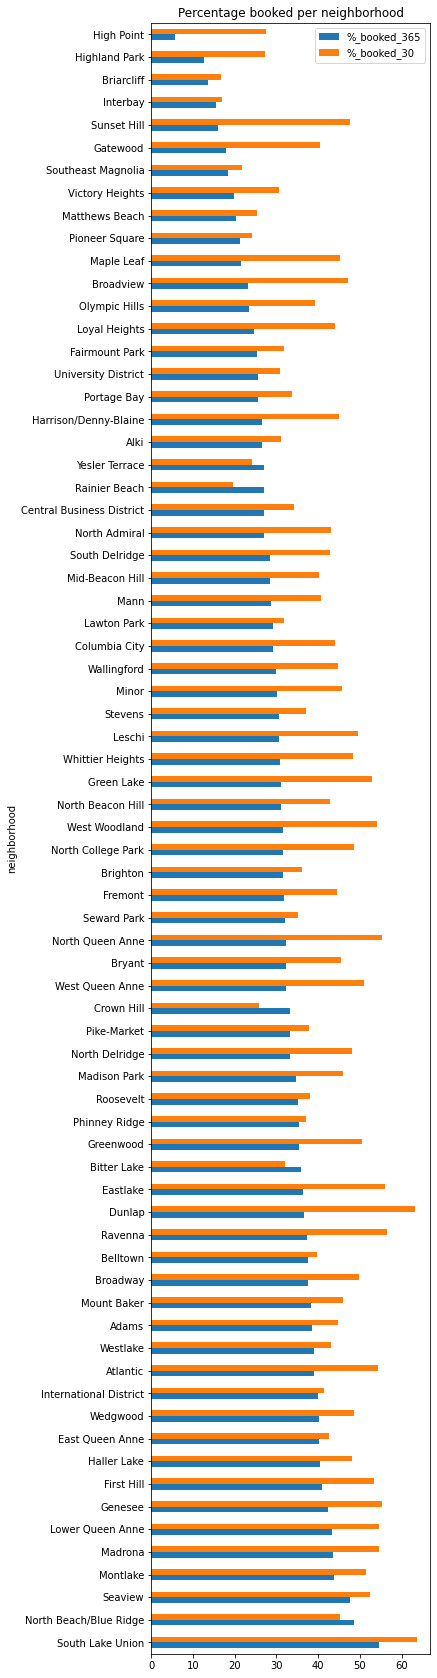

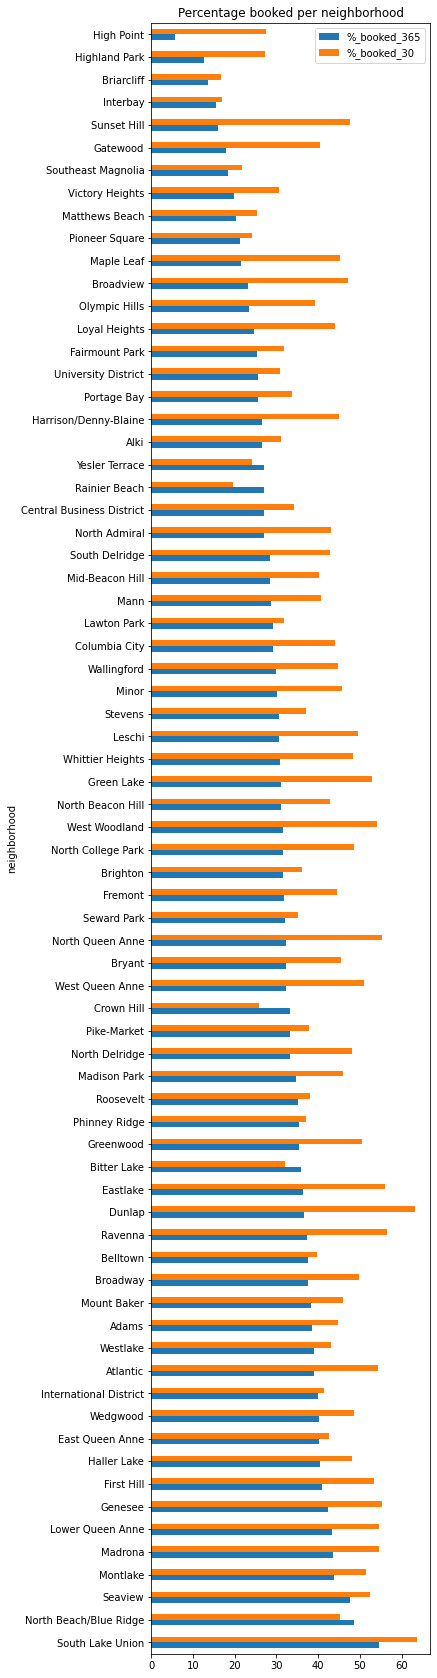

In [11]:
# plot a chart showing the comparison of booking rates at 365 days and 30 days
# show in order of booking percent at 365 days

hoodsAvgBooked[['%_booked_365','%_booked_30']].plot(kind='barh',figsize=(5,30),title="Percentage booked per neighborhood").get_figure()

In [12]:
# Some neighborhoods show a high degree of variation between early and late booking.
# Let's look into that more deeply by ranking the booking levels and comparing the ranks

av365rankS = hoodsAvg['availability_365'].rank().astype('int32')
av90rankS = hoodsAvg['availability_90'].rank().astype('int32')
av60rankS = hoodsAvg['availability_60'].rank().astype('int32')
av30rankS = hoodsAvg['availability_30'].rank().astype('int32')

In [13]:
# make a new dataframe for the rankings of each neighborhood in each time period

hoodsRankDF = pd.concat([av365rankS,av90rankS,av60rankS,av30rankS], axis=1)
hoodsRankDF.rename(columns={"availability_365":"booking_rank_365","availability_90":"booking_rank_90","availability_60":"booking_rank_60","availability_30":"booking_rank_30"},inplace=True)
hoodsRankDF.rename_axis("neighborhood",inplace=True)
hoodsRankDF.sort_values('booking_rank_365',ascending=True,inplace=True)
hoodsRankDF

,booking_rank_365,booking_rank_90,booking_rank_60,booking_rank_30
neighborhood,,,,
South Lake Union,1,1,1,1
North Beach/Blue Ridge,2,35,40,30
Seaview,3,3,2,13
Montlake,4,8,10,14
Madrona,5,4,7,7
...,...,...,...,...
Sunset Hill,68,18,13,24
Interbay,69,72,72,71
Briarcliff,70,67,70,72


In [14]:
# Clearly South Lake Union is the most popular neighborhood in Seattle
# because it has the highest booking at 30 days, 60 days, 90 days, and 365 days.
# Variation among booking levels of some other neighborhoods can be dramatic, though.

hoodsRankSTD = hoodsRankDF.std(axis=1)
hoodsRankSTD.round(1)

neighborhood
South Lake Union           0.0
North Beach/Blue Ridge    17.0
Seaview                    5.2
Montlake                   4.2
Madrona                    1.5
                          ... 
Sunset Hill               25.2
Interbay                   1.4
Briarcliff                 2.1
Highland Park              3.9
High Point                 3.8
Length: 72, dtype: float64

In [15]:
# take the average standard deviation of the booking ranks across all 4 time periods

hoodsRankSTD.mean()

7.7535010328206715

In [16]:
# Based on the second ranking neighborhood, North Beach/Blue Ridge, it seems some areas
# may be highly booked a year ahead of time but then other areas catch up in later time
# periods. So what happens if we drop the booking rank of each time period and then compare
# variation? Start with the 365-day time window:

hoodsRankNo365DF = hoodsRankDF.drop(['booking_rank_365'], axis=1)
hoodsRankNo365STD = hoodsRankNo365DF.std(axis=1)
hoodsRankNo365STD.mean()

3.7786556253083043

In [17]:
# Average standard deviation dropped with dropping the 365-day metric.
# What about the remaining time windows?

hoodsRankNo30DF = hoodsRankDF.drop(['booking_rank_30'], axis=1)
hoodsRankNo30STD = hoodsRankNo30DF.std(axis=1)

hoodsRankNo60DF = hoodsRankDF.drop(['booking_rank_60'], axis=1)
hoodsRankNo60STD = hoodsRankNo60DF.std(axis=1)

hoodsRankNo90DF = hoodsRankDF.drop(['booking_rank_90'], axis=1)
hoodsRankNo90STD = hoodsRankNo90DF.std(axis=1)

<AxesSubplot:title={'center':'Average deviation of booking rank with dropped time periods'}, xlabel='time period dropped from data set', ylabel='mean standard deviation of booking rank'>

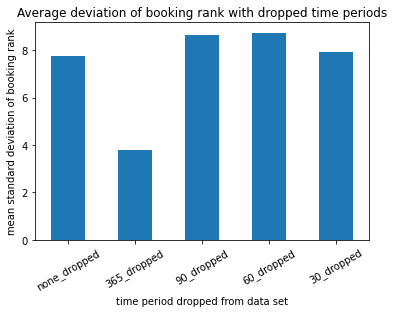

In [18]:
# build a dataframe of the results and plot the outcome

rankSTDwColumnDropped = pd.concat([hoodsRankSTD,hoodsRankNo365STD,hoodsRankNo90STD,hoodsRankNo60STD,hoodsRankNo30STD],axis=1)
rankSTDwColumnDropped.rename(columns={0:"none_dropped",1:"365_dropped",2:"90_dropped",3:"60_dropped",4:"30_dropped"},inplace=True)
rankSTDwColumnDropped.mean(axis=0).plot.bar(rot=30,
                                             title="Average deviation of booking rank with dropped time periods",
                                             xlabel="time period dropped from data set",
                                             ylabel="mean standard deviation of booking rank")

In [19]:
# Indeed it would appear that neighborhoods' booking ranks a year in advance deviate 
# markedly from their booking ranks at 30, 60, and 90 days.
# Which neighborhoods show this effect most dramatically?

rankSTDwColumnDropped['year_difference'] = rankSTDwColumnDropped['none_dropped']-rankSTDwColumnDropped['365_dropped']
rankSTDwColumnDropped.sort_values('year_difference',ascending=False,inplace=True)
rankSTDwColumnDropped.round(1)


,none_dropped,365_dropped,90_dropped,60_dropped,30_dropped,year_difference
neighborhood,,,,,,
Sunset Hill,25.2,5.5,29.1,27.3,30.4,19.7
Belltown,15.0,1.0,17.6,17.0,17.3,14.0
East Queen Anne,15.1,1.7,17.9,17.1,17.1,13.3
Broadview,18.7,5.5,22.7,19.5,21.8,13.2
Phinney Ridge,13.2,0.6,15.3,15.3,15.0,12.6
...,...,...,...,...,...,...
Atlantic,4.4,5.3,4.0,5.0,3.1,-0.9
Seaview,5.2,6.1,6.1,5.8,0.6,-0.9
North Delridge,5.1,6.1,5.0,5.5,3.2,-1.0


In [20]:
# Look at the 20 biggest differences upon dropping the 365-day booking rank

hoodsRankDF['year_STD_difference'] = rankSTDwColumnDropped['year_difference']
hoodsRankDF.sort_values('year_STD_difference',ascending=False)


,booking_rank_365,booking_rank_90,booking_rank_60,booking_rank_30,year_STD_difference
neighborhood,,,,,
Sunset Hill,68,18,13,24,19.729637
Belltown,17,46,48,47,14.022206
East Queen Anne,11,39,42,42,13.334468
Broadview,61,30,19,25,13.207397
Phinney Ridge,24,50,50,51,12.597753
...,...,...,...,...,...
Atlantic,13,19,17,9,-0.856791
Seaview,3,3,2,13,-0.894635
North Delridge,27,33,32,22,-1.016534


In [21]:
# Sunset Hill looks noteworthy in its difference in rank between 365 days and the other time periods,
# but Phinney Ridge doesn't seem to deserve spot #5 for important differences. Let's try comparing
# means instead of standard deviations.

hoodsRankNo365 = hoodsRankDF[['booking_rank_90','booking_rank_60','booking_rank_30']].mean(axis=1)
hoodsRankDF['year_AVG_change'] = hoodsRankDF['booking_rank_365'] - hoodsRankNo365
hoodsRankDF = hoodsRankDF.round(1)
hoodsRankDF

,booking_rank_365,booking_rank_90,booking_rank_60,booking_rank_30,year_STD_difference,year_AVG_change
neighborhood,,,,,,
South Lake Union,1,1,1,1,0.0,0.0
North Beach/Blue Ridge,2,35,40,30,12.0,-33.0
Seaview,3,3,2,13,-0.9,-3.0
Montlake,4,8,10,14,1.1,-6.7
Madrona,5,4,7,7,-0.2,-1.0
...,...,...,...,...,...,...
Sunset Hill,68,18,13,24,19.7,49.7
Interbay,69,72,72,71,0.8,-2.7
Briarcliff,70,67,70,72,-0.5,0.3


In [54]:
# now that looks more like it. use absolute value to order based on the largest differences and plot
hoodsRankDF['absVal'] = hoodsRankDF['year_AVG_change'].abs()
hoodsRankDF.sort_values('absVal',ascending=False,inplace=True)
hoodsRankDF[['booking_rank_365',
             'booking_rank_90',
             'booking_rank_60',
             'booking_rank_30',
             'year_AVG_change']].style.set_precision(1).bar(subset=['year_AVG_change'], align='mid', color=['#d65f5f', '#5fba7d'])

,booking_rank_365,booking_rank_90,booking_rank_60,booking_rank_30,year_AVG_change
neighborhood,,,,,
Sunset Hill,68,18,13,24,49.7
Broadview,61,30,19,25,36.3
North Beach/Blue Ridge,2,35,40,30,-33.0
Green Lake,39,5,5,12,31.7
Bitter Lake,22,49,51,57,-30.3
Belltown,17,46,48,47,-30.0
East Queen Anne,11,39,42,42,-30.0
Crown Hill,28,51,57,65,-29.7
Pike-Market,29,64,60,50,-29.0
